In [1]:
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd

file="content"
traindir="datasets/binary_train"
testdir="datasets/binary_test"


Using TensorFlow backend.


In [2]:
# load the dataset
traindata = pd.read_csv(f"{traindir}/processed/{file}.csv")
testdata = pd.read_csv(f"{testdir}/processed/{file}.csv")
n=len(traindata.count())
n

14

In [4]:
# split into input (X) and output (y) variables
X = traindata.iloc[:,0:n-1]
y = traindata.iloc[:,n-1]
X_test = testdata.iloc[:,0:n-1]
y_test = testdata.iloc[:,n-1]

In [5]:
# define the keras model
model = Sequential()
model.add(Dense(64, input_dim=n-1, activation='relu'))
model.add(Dense(36, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [6]:

# compile the keras model

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:

# fit the keras model on the dataset
history = model.fit(X, y, epochs=100, batch_size=5000,validation_split=0.2)


Train on 100778 samples, validate on 25195 samples
Epoch 1/100
100778/100778 [==============================] - 1s 5us/step - loss: 0.6500 - accuracy: 0.5342 - val_loss: 0.6132 - val_accuracy: 0.5338
Epoch 2/100
100778/100778 [==============================] - 0s 2us/step - loss: 0.5761 - accuracy: 0.7543 - val_loss: 0.5272 - val_accuracy: 0.8323
Epoch 3/100
100778/100778 [==============================] - 0s 2us/step - loss: 0.4907 - accuracy: 0.8283 - val_loss: 0.4481 - val_accuracy: 0.8326
Epoch 4/100
100778/100778 [==============================] - 0s 2us/step - loss: 0.4261 - accuracy: 0.8324 - val_loss: 0.4001 - val_accuracy: 0.8396
Epoch 5/100
100778/100778 [==============================] - 0s 2us/step - loss: 0.3918 - accuracy: 0.8358 - val_loss: 0.3799 - val_accuracy: 0.8389
Epoch 6/100
100778/100778 [==============================] - 0s 3us/step - loss: 0.3824 - accuracy: 0.8358 - val_loss: 0.3772 - val_accuracy: 0.8395
Epoch 7/100
100778/100778 [============================

100778/100778 [==============================] - 0s 2us/step - loss: 0.3780 - accuracy: 0.8360 - val_loss: 0.3747 - val_accuracy: 0.8398
Epoch 56/100
100778/100778 [==============================] - 0s 2us/step - loss: 0.3779 - accuracy: 0.8363 - val_loss: 0.3754 - val_accuracy: 0.8392
Epoch 57/100
100778/100778 [==============================] - 0s 2us/step - loss: 0.3778 - accuracy: 0.8365 - val_loss: 0.3752 - val_accuracy: 0.8399
Epoch 58/100
100778/100778 [==============================] - 0s 2us/step - loss: 0.3778 - accuracy: 0.8365 - val_loss: 0.3760 - val_accuracy: 0.8392
Epoch 59/100
100778/100778 [==============================] - 0s 2us/step - loss: 0.3783 - accuracy: 0.8363 - val_loss: 0.3762 - val_accuracy: 0.8392
Epoch 60/100
100778/100778 [==============================] - 0s 2us/step - loss: 0.3781 - accuracy: 0.8363 - val_loss: 0.3760 - val_accuracy: 0.8399
Epoch 61/100
100778/100778 [==============================] - 0s 2us/step - loss: 0.3782 - accuracy: 0.8364 - val

In [9]:

# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

22542/22542 [==============================] - 0s 13us/step
Accuracy: 77.36


In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
prediction=model.predict_classes(X_test)
m=confusion_matrix(y_test,prediction)
m

array([[ 7348,  2362],
       [ 2742, 10090]], dtype=int64)

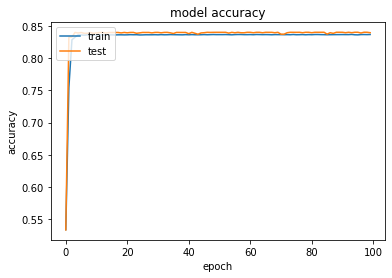

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [11]:

# make probability predictions with the model
predictions = model.predict(X)
# round predictions 
rounded = [round(x[0]) for x in predictions]
print(rounded[1] )

0.0
